## About
This program examines the lead-lag relationships among several world indices using a module for the 
estimation of the lead-lag from non-synchronous data <a href='https://github.com/philipperemy/lead-lag'>(link)</a>.


## Import modules

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import lead_lag
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

## Download historical data

#### Set start date and end date

In [2]:
start_date = datetime.now() - relativedelta(months=24)
start_date = start_date.strftime('%Y-%m-%d')
end_date = str(datetime.now().strftime('%Y-%m-%d'))

#### Fetch data from Yahoo Finance

In [3]:
tickers = ['^GSPC', 'FTAD.SW', '^GDAXI', '^N100', '^N225', '^HSI', '^AXJO', '^JKSE']

In [4]:
df = yf.download(tickers, start=start_date, end=end_date)['Close']

[*********************100%***********************]  8 of 8 completed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2019-08-23 to 2021-08-23
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FTAD.SW  420 non-null    float64
 1   ^AXJO    507 non-null    float64
 2   ^GDAXI   505 non-null    float64
 3   ^GSPC    504 non-null    float64
 4   ^HSI     494 non-null    float64
 5   ^JKSE    486 non-null    float64
 6   ^N100    512 non-null    float64
 7   ^N225    484 non-null    float64
dtypes: float64(8)
memory usage: 36.6 KB


In [6]:
df.head(5)

,FTAD.SW,^AXJO,^GDAXI,^GSPC,^HSI,^JKSE,^N100,^N225
Date,,,,,,,,
2019-08-23,5.887,NaN,11611.509766,2847.110107,NaN,NaN,1035.170044,NaN
2019-08-26,5.868,6440.100098,11658.040039,2878.379883,25680.330078,6214.509766,1037.810059,20261.039062
2019-08-27,5.837,6471.200195,11730.019531,2869.159912,25664.070312,6278.170898,1045.199951,20456.080078
2019-08-28,5.881,6500.600098,11701.019531,2887.939941,25615.480469,6281.645996,1042.329956,20479.419922
2019-08-29,5.874,6507.399902,11838.879883,2924.580078,25703.500000,6289.119141,1056.910034,20460.929688


#### Plot historical data

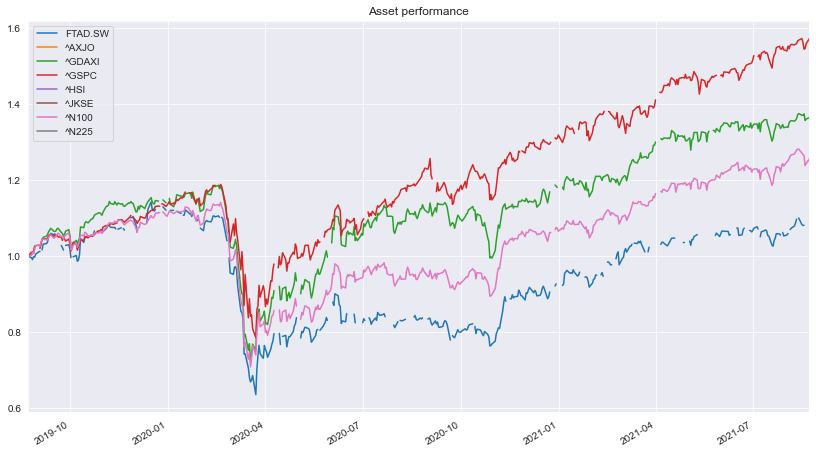

In [7]:
title = 'Asset performance'
ax = (df/df.iloc[0]).plot(figsize=(14,8), title=title)
ax.set_xlim(start_date, end_date)
ax.autoscale(tight=True, axis='x')
ax.set(xlabel='');

## Explore the lead-lag relationships

#### Define a function to convert the dataframe into the lead-lag module format

In [8]:
def convert_to_ll_format(series, start_date, end_date, rule=None):
    """
    Pass in a series, a start date, an end date, the rule for resampling,
    and returns a numpy array formatted for the lead_lag module.
    """ 
    if rule is not None:
        series = series.resample(rule=rule).mean()
    series = series.loc[start_date:end_date].fillna(method='ffill')
    array = np.column_stack((range(len(series)), series))
    return array

#### Calculate the lead-lag effects

---------------------------------------------
Comparing ^GSPC & FTAD.SW
Estimated lag = 0 days.


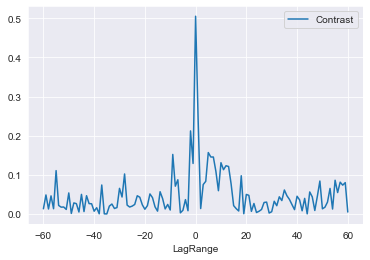

---------------------------------------------
Comparing ^GSPC & ^GDAXI
Estimated lag = 0 days.


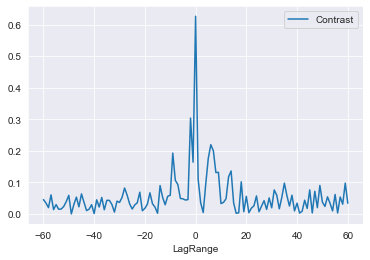

---------------------------------------------
Comparing ^GSPC & ^N100
Estimated lag = 0 days.


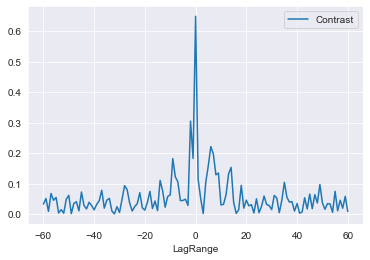

---------------------------------------------
Comparing ^GSPC & ^N225
Estimated lag = 1 days.


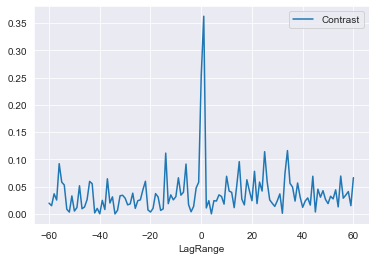

---------------------------------------------
Comparing ^GSPC & ^HSI
Estimated lag = 0 days.


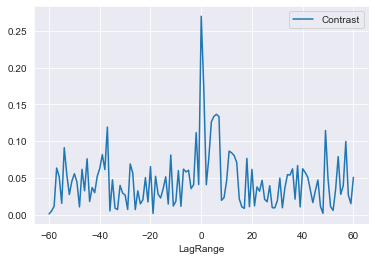

---------------------------------------------
Comparing ^GSPC & ^AXJO
Estimated lag = 0 days.


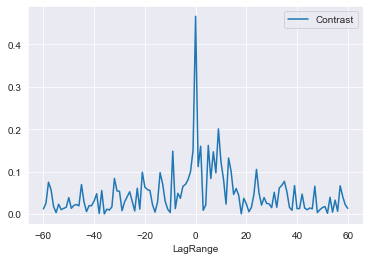

---------------------------------------------
Comparing ^GSPC & ^JKSE
Estimated lag = 0 days.


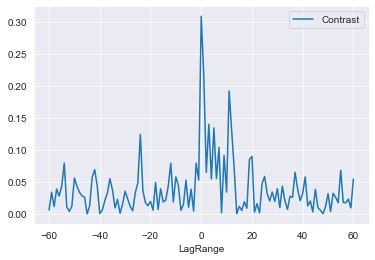

---------------------------------------------
Comparing FTAD.SW & ^GDAXI
Estimated lag = 0 days.


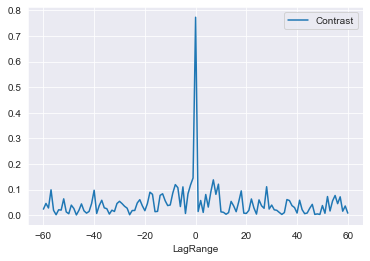

---------------------------------------------
Comparing FTAD.SW & ^N100
Estimated lag = 0 days.


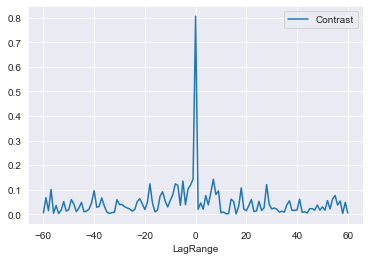

---------------------------------------------
Comparing FTAD.SW & ^N225
Estimated lag = 0 days.


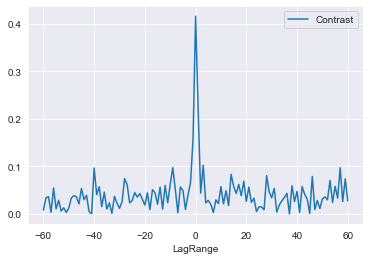

---------------------------------------------
Comparing FTAD.SW & ^HSI
Estimated lag = 0 days.


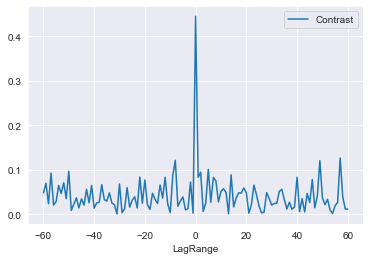

---------------------------------------------
Comparing FTAD.SW & ^AXJO
Estimated lag = 0 days.


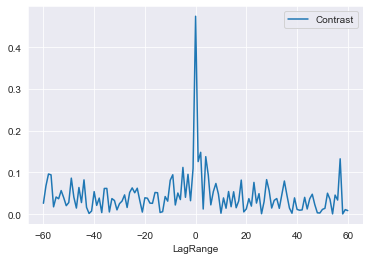

---------------------------------------------
Comparing FTAD.SW & ^JKSE
Estimated lag = 0 days.


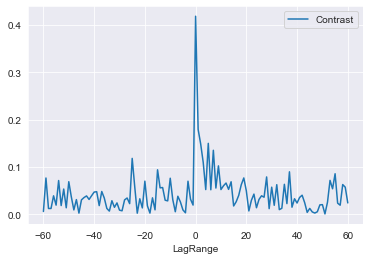

---------------------------------------------
Comparing ^GDAXI & ^N100
Estimated lag = 0 days.


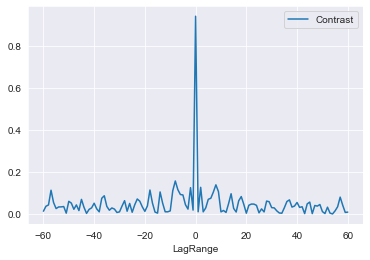

---------------------------------------------
Comparing ^GDAXI & ^N225
Estimated lag = 0 days.


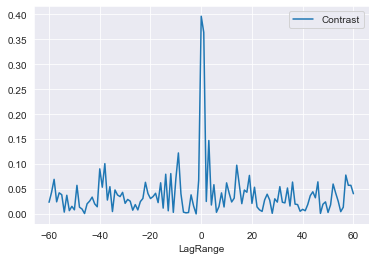

---------------------------------------------
Comparing ^GDAXI & ^HSI
Estimated lag = 0 days.


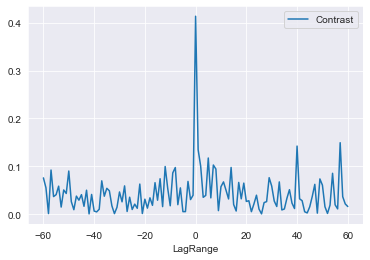

---------------------------------------------
Comparing ^GDAXI & ^AXJO
Estimated lag = 0 days.


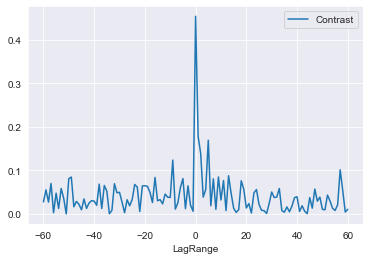

---------------------------------------------
Comparing ^GDAXI & ^JKSE
Estimated lag = 0 days.


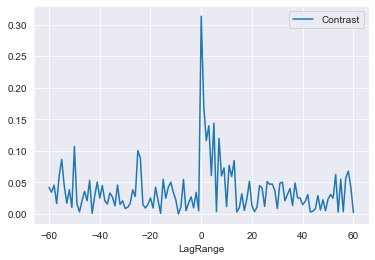

---------------------------------------------
Comparing ^N100 & ^N225
Estimated lag = 0 days.


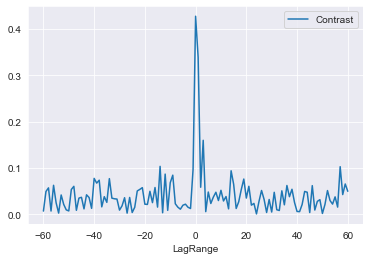

---------------------------------------------
Comparing ^N100 & ^HSI
Estimated lag = 0 days.


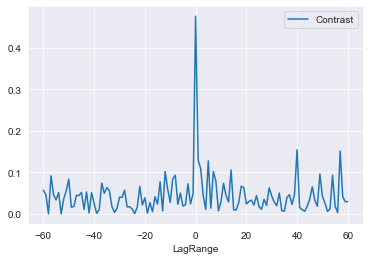

---------------------------------------------
Comparing ^N100 & ^AXJO
Estimated lag = 0 days.


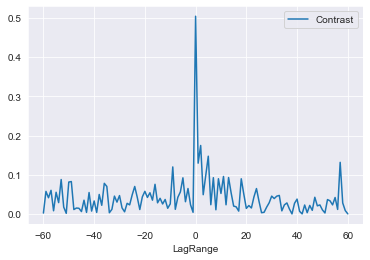

---------------------------------------------
Comparing ^N100 & ^JKSE
Estimated lag = 0 days.


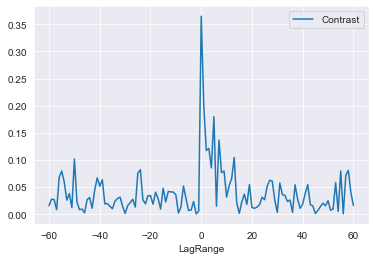

---------------------------------------------
Comparing ^N225 & ^HSI
Estimated lag = 0 days.


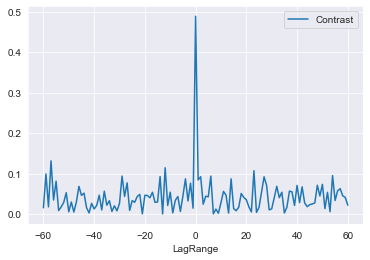

---------------------------------------------
Comparing ^N225 & ^AXJO
Estimated lag = 0 days.


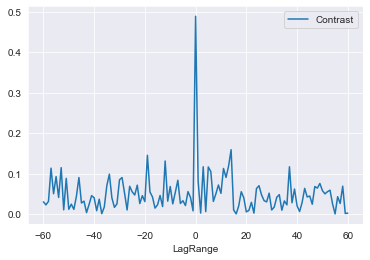

---------------------------------------------
Comparing ^N225 & ^JKSE
Estimated lag = 0 days.


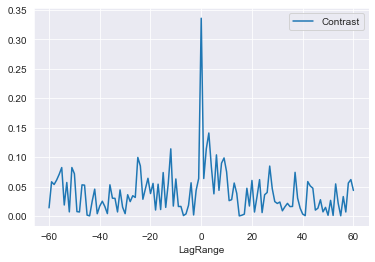

---------------------------------------------
Comparing ^HSI & ^AXJO
Estimated lag = 0 days.


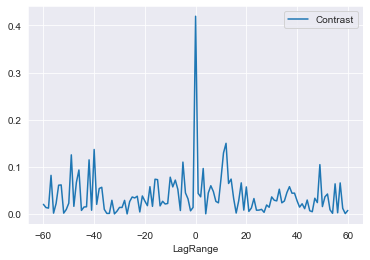

---------------------------------------------
Comparing ^HSI & ^JKSE
Estimated lag = 0 days.


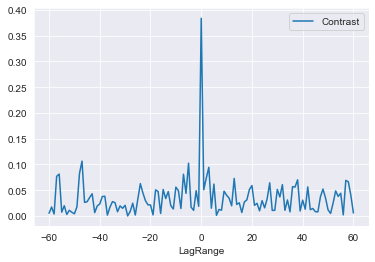

---------------------------------------------
Comparing ^AXJO & ^JKSE
Estimated lag = 0 days.


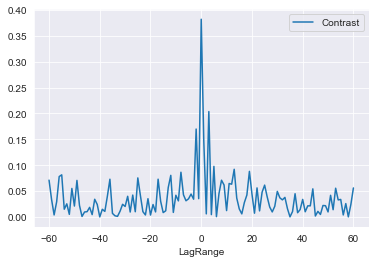

In [9]:
for x,y in combinations(tickers, 2):
    print('---------------------------------------------')
    print('Comparing ' + x + ' & ' + y)
    ll = lead_lag.LeadLag(convert_to_ll_format(df[x], start_date, end_date), 
                          convert_to_ll_format(df[y], start_date, end_date), 
                          max_absolute_lag=60, verbose=False)
    ll.run_inference(multi_threading=True)
    print(f'Estimated lag = {ll.lead_lag} days.')
    ll.plot_results()